**<h1> Titanic - Machine Learning from Disaster </h1>**

<h2> The Challenge </h2>

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

<h2> Objective </h2>

The main target of this project is to elaborate an Exploritary Data Analysis to identify what is the best way to deal with the features given, their correlation and ultimately the influence that they have over whether the individual survived or not, during the Titanic sinking. Finally, in order to participate in the competition, a simple ensemble modelling will be made to predict the survival of the people of the test set

<h3> Setup/Import libraries </h3>

In [34]:
# Data management
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings management
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Sklearn packages
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# My functions
from Plot_percentages import show_percentages
from Tukey import detect_outliers
from Plot_learning_curve import plot_learning_curve

train = pd.read_csv('../Titanic-academic-EDA/train.csv')
test = pd.read_csv('../Titanic-academic-EDA/test.csv')

<h2> Dataset Analysis </h2>




In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First look to the dataset, to get familiarized with the features given by the exercise. The text of the competiton gives the next information about the variables:

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**embarked**: Which port the passanger boarded the Titanic from.
C = Cherbourg
Q = Queenstown
S = Southampton

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**survived, name, sex, ticket and fare** are pretty self-explanatory

In [36]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In here the first information gotten from the dataset.

First of all, the types of each of the features can be interpreted differently. For example it is obvious that the age the fare are type float32 the way they are described. On the other hand, some features are described as type int64 but have categorical behaviour, like Pclass which assigns a socio economic status to the individual, or the SibSp and Parch, which give information about the family size. Some categorical variables are pretty straight-forward like sex, a binary classification, and others are harder to evaluate and it is going to be needed to take a look at them individually, like Ticket and Name.

Secondly the amount of missing values associated to each variable gives an idea on how to first approach the problem. For example age and cabin have missing values in both the train and the test dataset, but since less than 20% of all the age values are missing a good strategy would be to impute the missing values whereas over 75% of the cabin values are missing. Cabin could potentially give information of the position where the passenger was located when the sinking happened and it's useful information, but the vast amount of missing values makes the variable very hard to deal with since imputing this large amount of values could potentially add a big inaccuracy to the analysis. It is important to note that there is one single missing value for Fare in the test set.

Finally, taking a look at the statistichal summarization of both dataset it is possible to conclude that there are some aberrant values for parch, sibsp and fare, by comparing the percentile 75 and the max, showing that somebody payed too much compared to the rest of the passangers and that there were so many few big families on board, where most individuals where travelling alone on in smaller families. These values will be caught by an outlier detection function that follows the Tukey method.

For data analysis of the variables it's going to be easier to unify both datasets to represent all the variables. PassengerId is a duplicate of the index row and cabin will not be considered in the analysis, as stated before.

In [38]:
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
dataset=dataset.drop(['PassengerId','Cabin'],axis=1)

In [39]:
for col in dataset.columns:
    if dataset[col].dtype in ['int64','object'] and col != 'Survived':
        print('{} has {} unique values'.format(col,dataset[col].nunique()))

Pclass has 3 unique values
Name has 1307 unique values
Sex has 2 unique values
SibSp has 7 unique values
Parch has 8 unique values
Ticket has 929 unique values
Embarked has 3 unique values


In [40]:
num_cols = [col for col in dataset.columns if dataset[col].dtype in ['int64','float64']]
outliers_train = detect_outliers(dataset[0:train_len],2,num_cols)
outliers = detect_outliers(dataset,2,num_cols)

In [41]:
dataset.loc[outliers_train]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,S
88,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,S
159,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,S
180,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,S
201,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,S
324,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,S
341,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,S
792,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,S
846,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,S
863,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,S


In [42]:
dataset.loc[outliers]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


Running the outlier detection function over the train dataset gives some passengers that either paid too much or belong to a big family. Nevertheless, the same function applied to the whole dataset shows no aberrant values, which means that the test dataset has values closer to these outliers, and dropping them would make the future model used for prediction lose valuable information.

In [43]:
dataset[dataset.Name.duplicated(keep=False)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
289,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,Q
696,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,S
891,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
897,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q


Running the duplicate function over the name of the passengers 2 couples of people sharing the same name pop up but since the rest of the features are different, erasing the duplicates would imply that not enough reliability is been given to the features even before the analysis, so they have to be kept for the moment.

<h2> Data visualization: Univariable </h2>

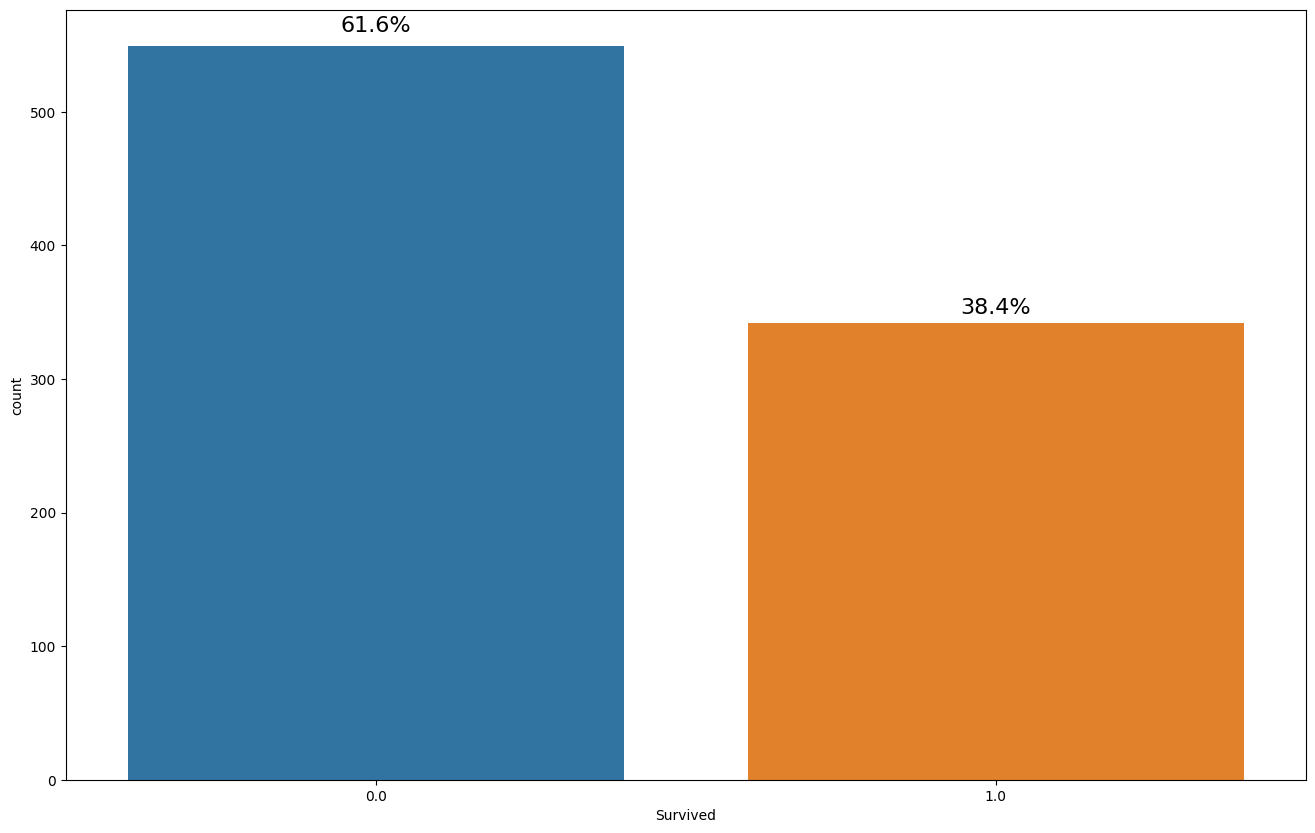

In [44]:
plt.figure(figsize=(16,10))
ax = sns.countplot(data = dataset[0:train_len], x = 'Survived')
show_percentages(ax,train_len)
plt.show()

The variable used as target here, Survived, shows that most of the individuals that belong to the train dataset perished in the Titanic sink

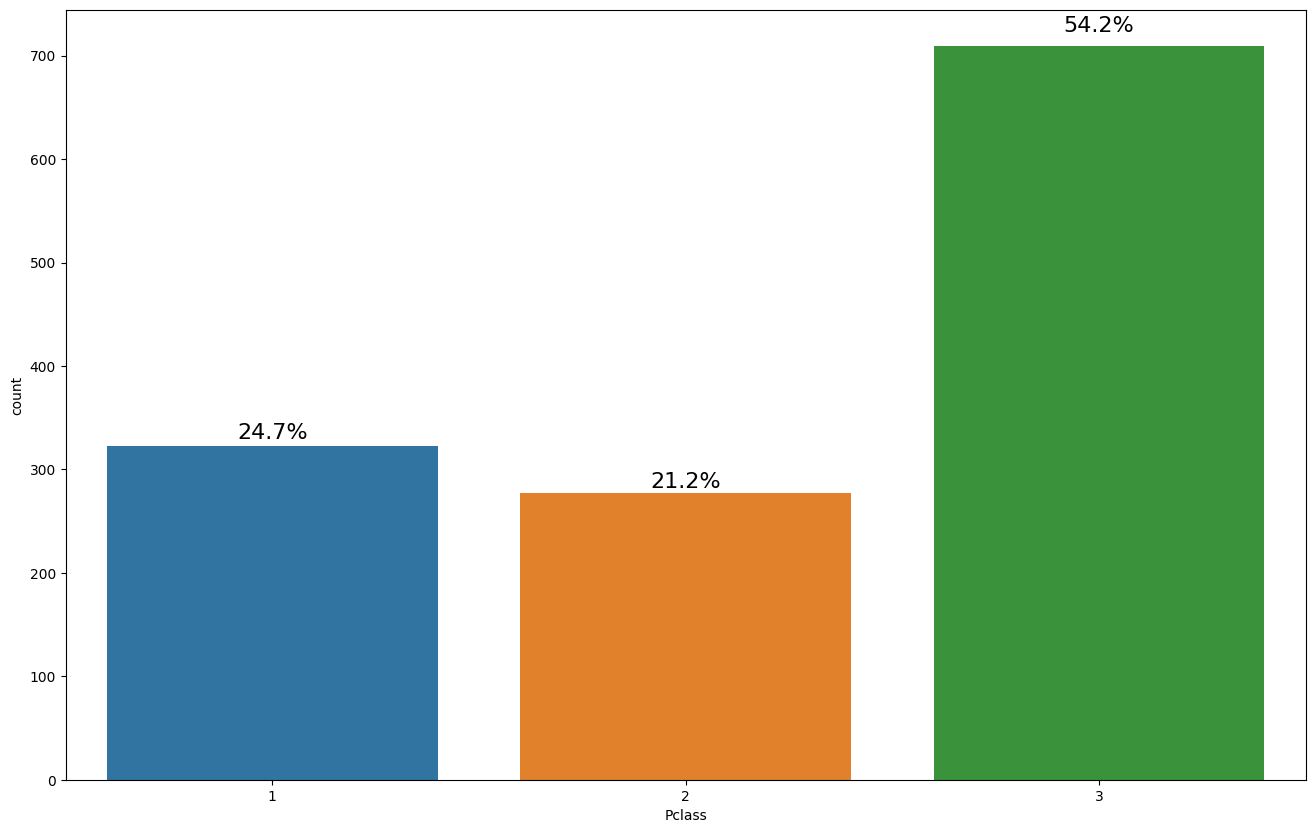

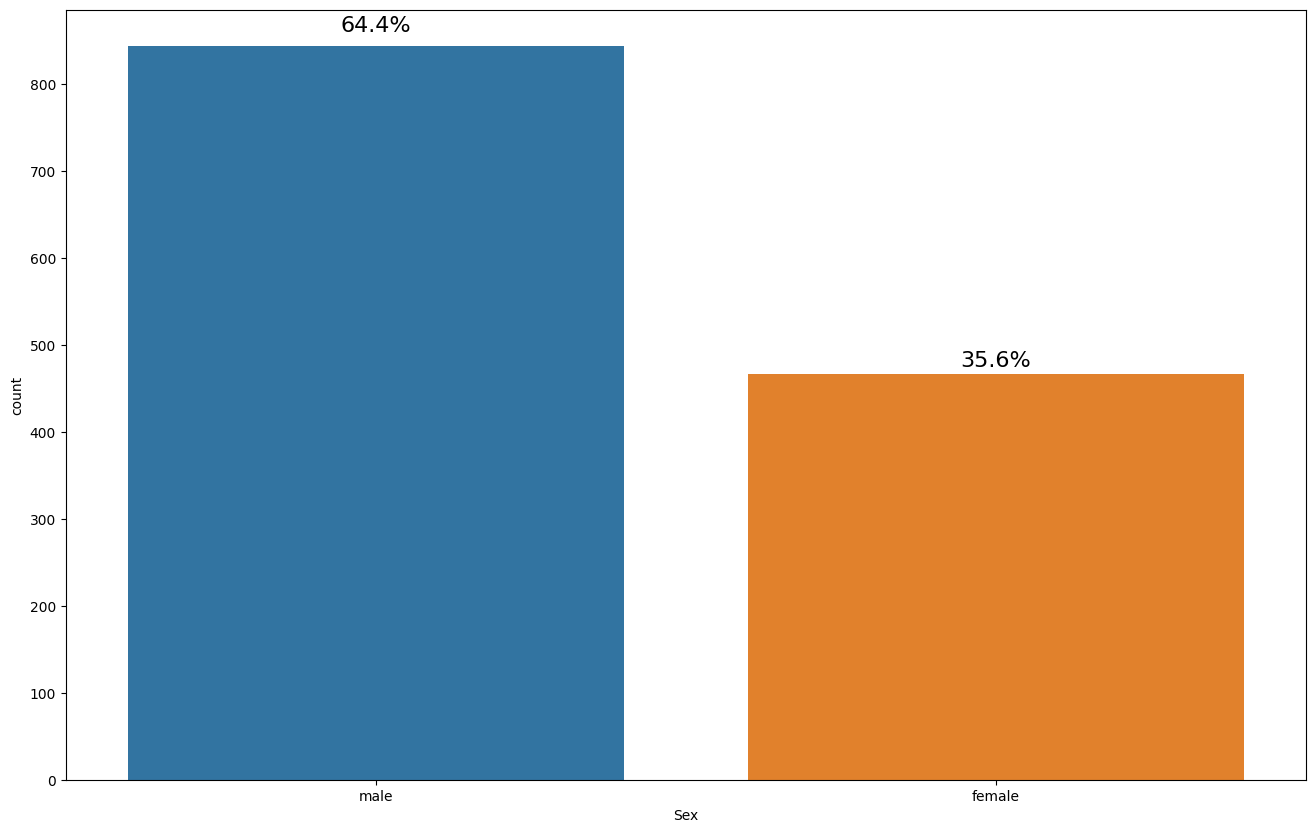

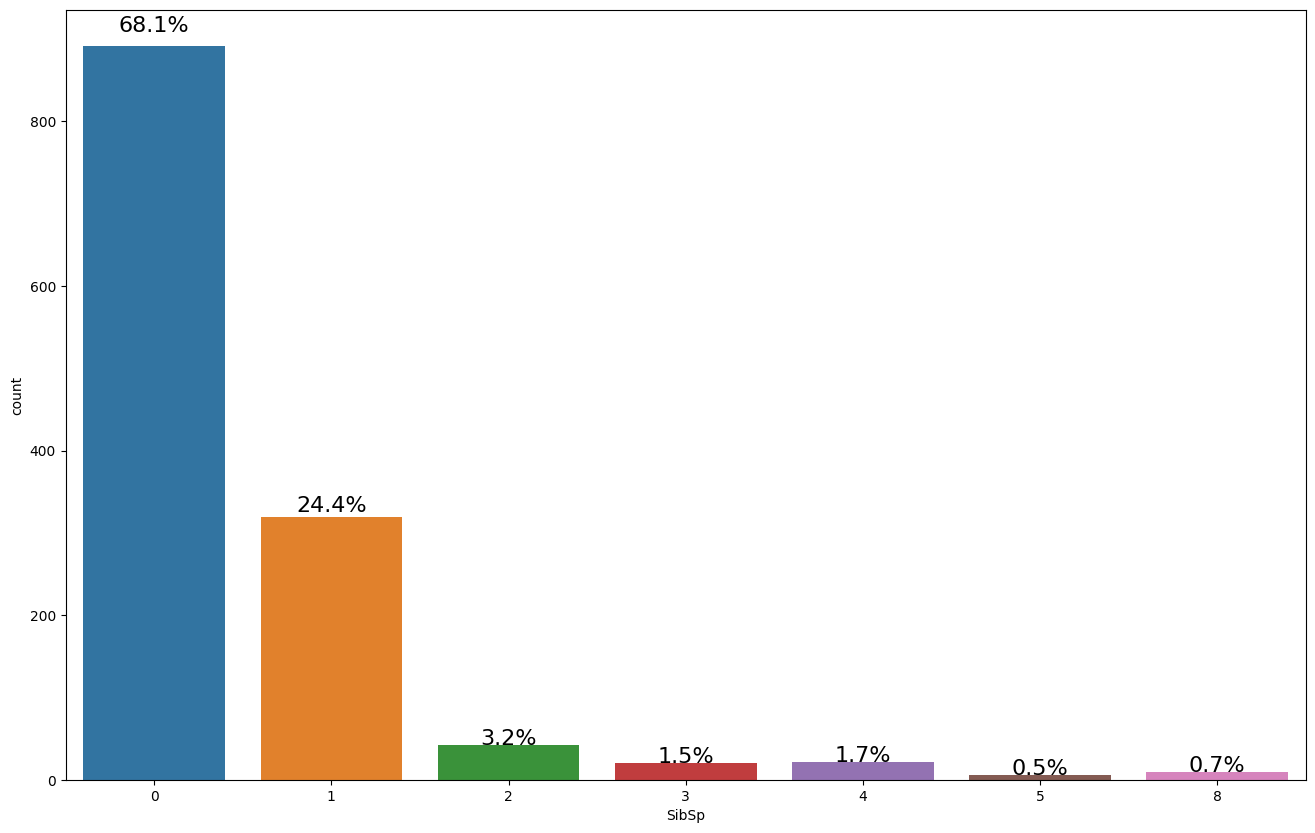

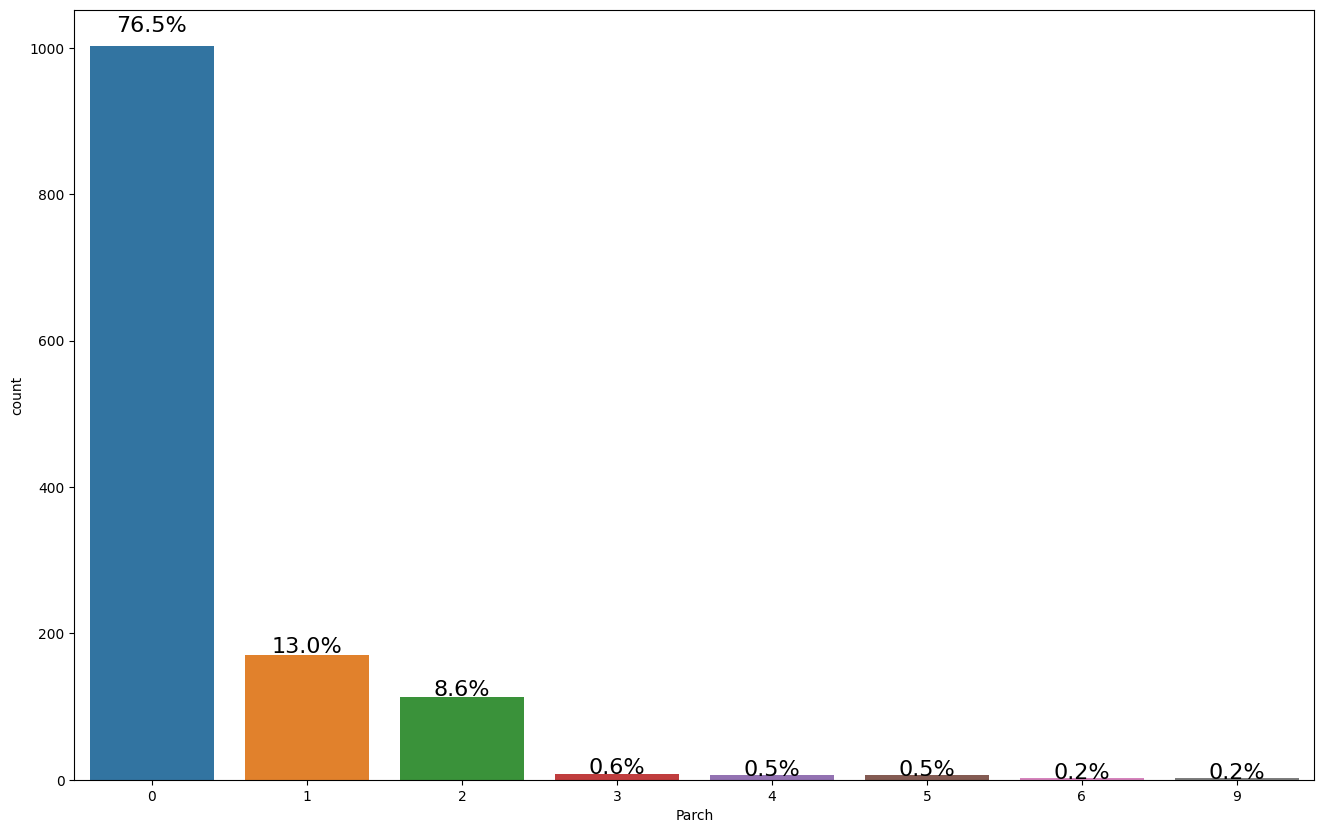

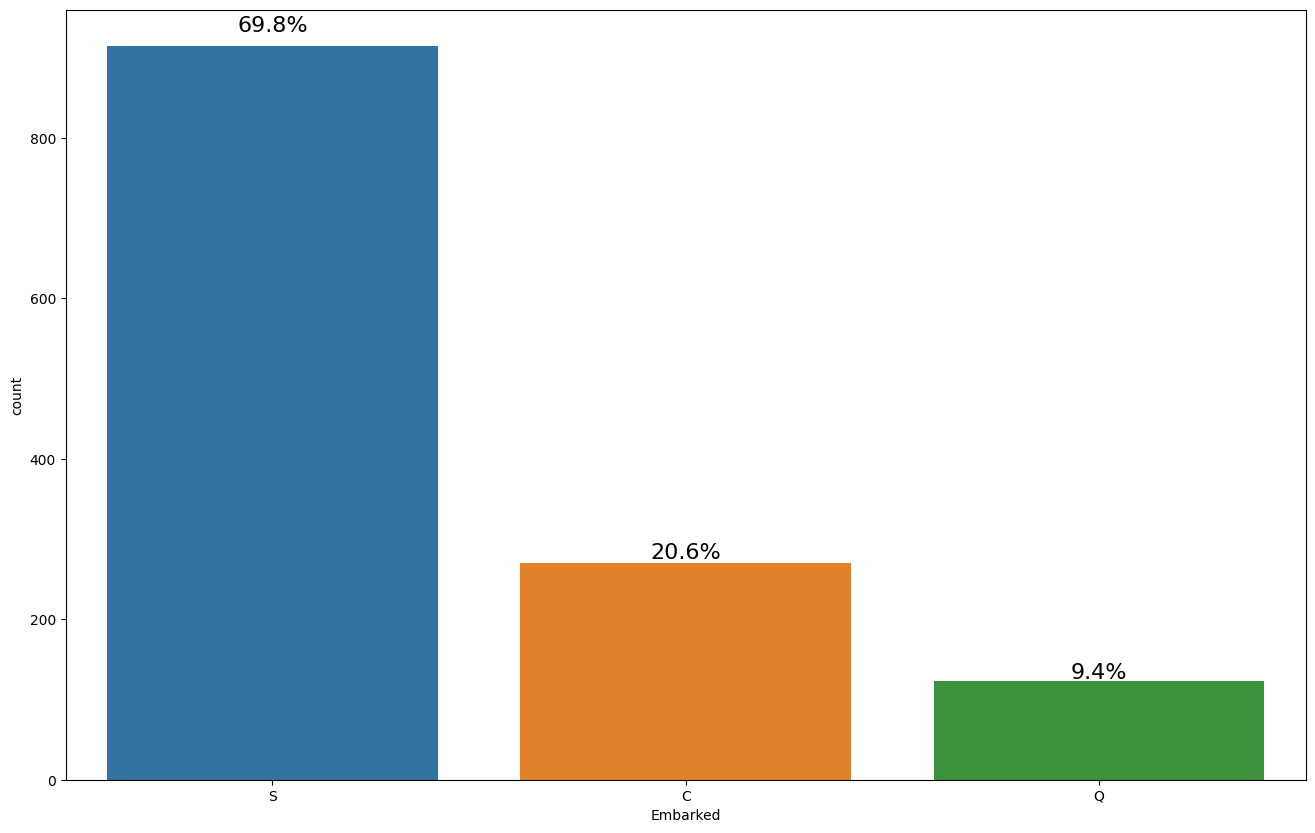

In [45]:
for col in dataset.columns:
    if dataset[col].dtype in ['int64','object'] and dataset[col].nunique()<10:
        plt.figure(figsize=(16,10))
        ax = sns.countplot(data = dataset, x=col)
        show_percentages(ax,len(dataset))
        plt.show()

The visualization over the distribution of the features that are either categorical or integers but with a short amount of unique values, maximum set to 10.

The average passenger belonged to the lower class, was a male, single and without siblings aboard and boarded the Titanic in Southampton.

<h2> Data Visualization: Bivariate </h2>

<h3> Feature Engineering </h3>

A priori, the name feature gives no valuable information unless a deep analysis of the last names of the passengers back them could give more information about the socio-economic status of each individual, but it's a bit out of scope for this project. Nevertheless, taking a sample of the dataset shows that the Title of the passenger is included in the name and that can potentially give some information about the passenger, so it'll be useful to extract it and work with that instead of the full name:

In [46]:
regex = "([A-Za-z]+)\."
import re 

def get_title(row):
    match = re.search(regex, str(row))
    title = match.group(0);
    return title

dataset.Name.apply(lambda x: get_title(x)).value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Name, dtype: int64

Over 95% of all the values are grouped in only 4 categories, that by the way, seem from the first look heavily influenced by the sex. Hence the titles more unusual will be grouped into a category named "Rare" 

In [47]:
dataset['Title'] = dataset.Name.apply(lambda x:get_title(x))
dataset.loc[dataset['Title'].value_counts()[dataset['Title']].values < 10, 'Title'] = "Rare"

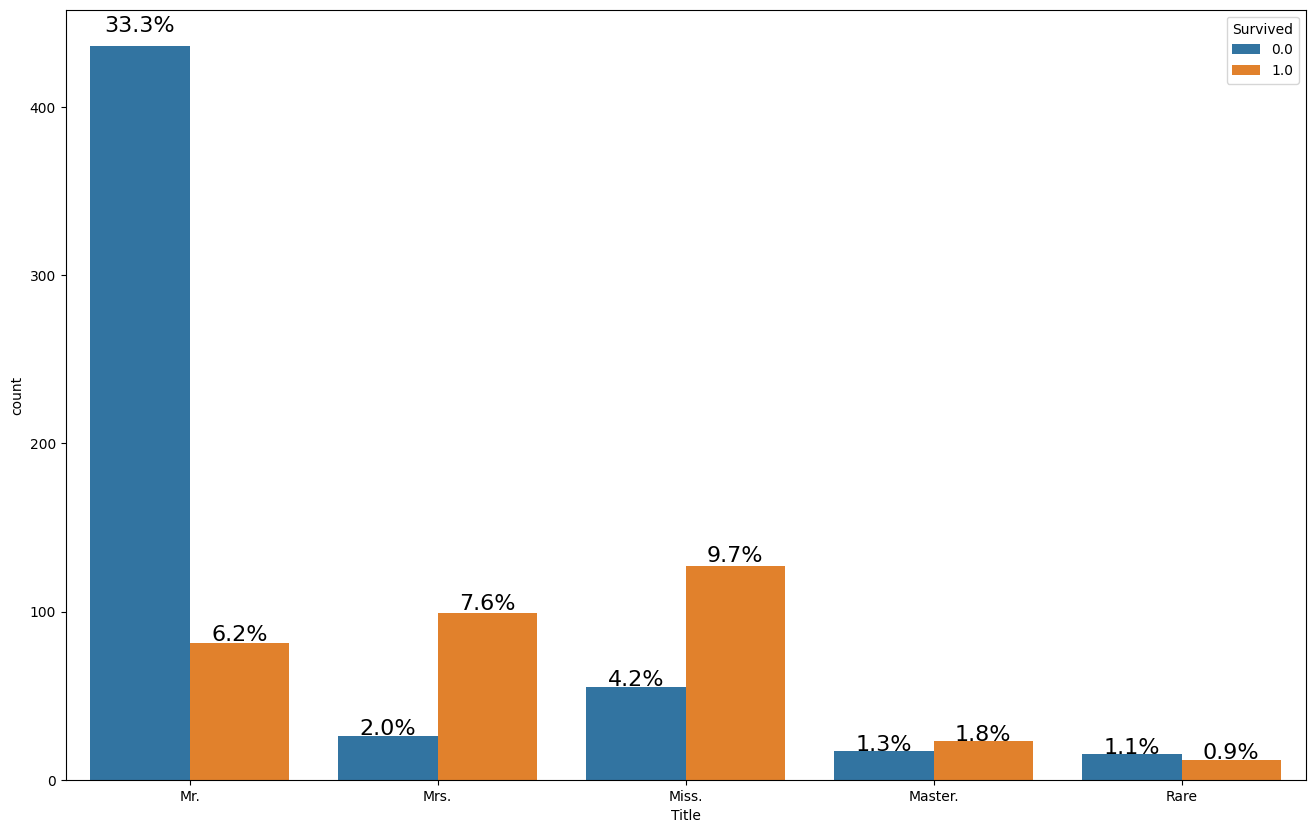

In [48]:
plt.figure(figsize=(16,10))
ax = sns.countplot(data = dataset, x='Title', hue='Survived')
show_percentages(ax,len(dataset))

As expected, the survival chance is higher on female titles, where a "Mr." had less than 20% chance of survival back then.

Following the analysis, it is noticeable that Sibsp and Parch are not variables very different from one another, since both give information about the size of the family on board of the Titanic. That's why they can be grouped in a single feature with a simple addition.

In [49]:
dataset['Family_size'] = dataset['SibSp']+dataset['Parch']
dataset = dataset.drop(['Name','SibSp','Parch'],axis=1) #Dropping the name too, there is already the Title

<AxesSubplot: xlabel='Embarked', ylabel='count'>

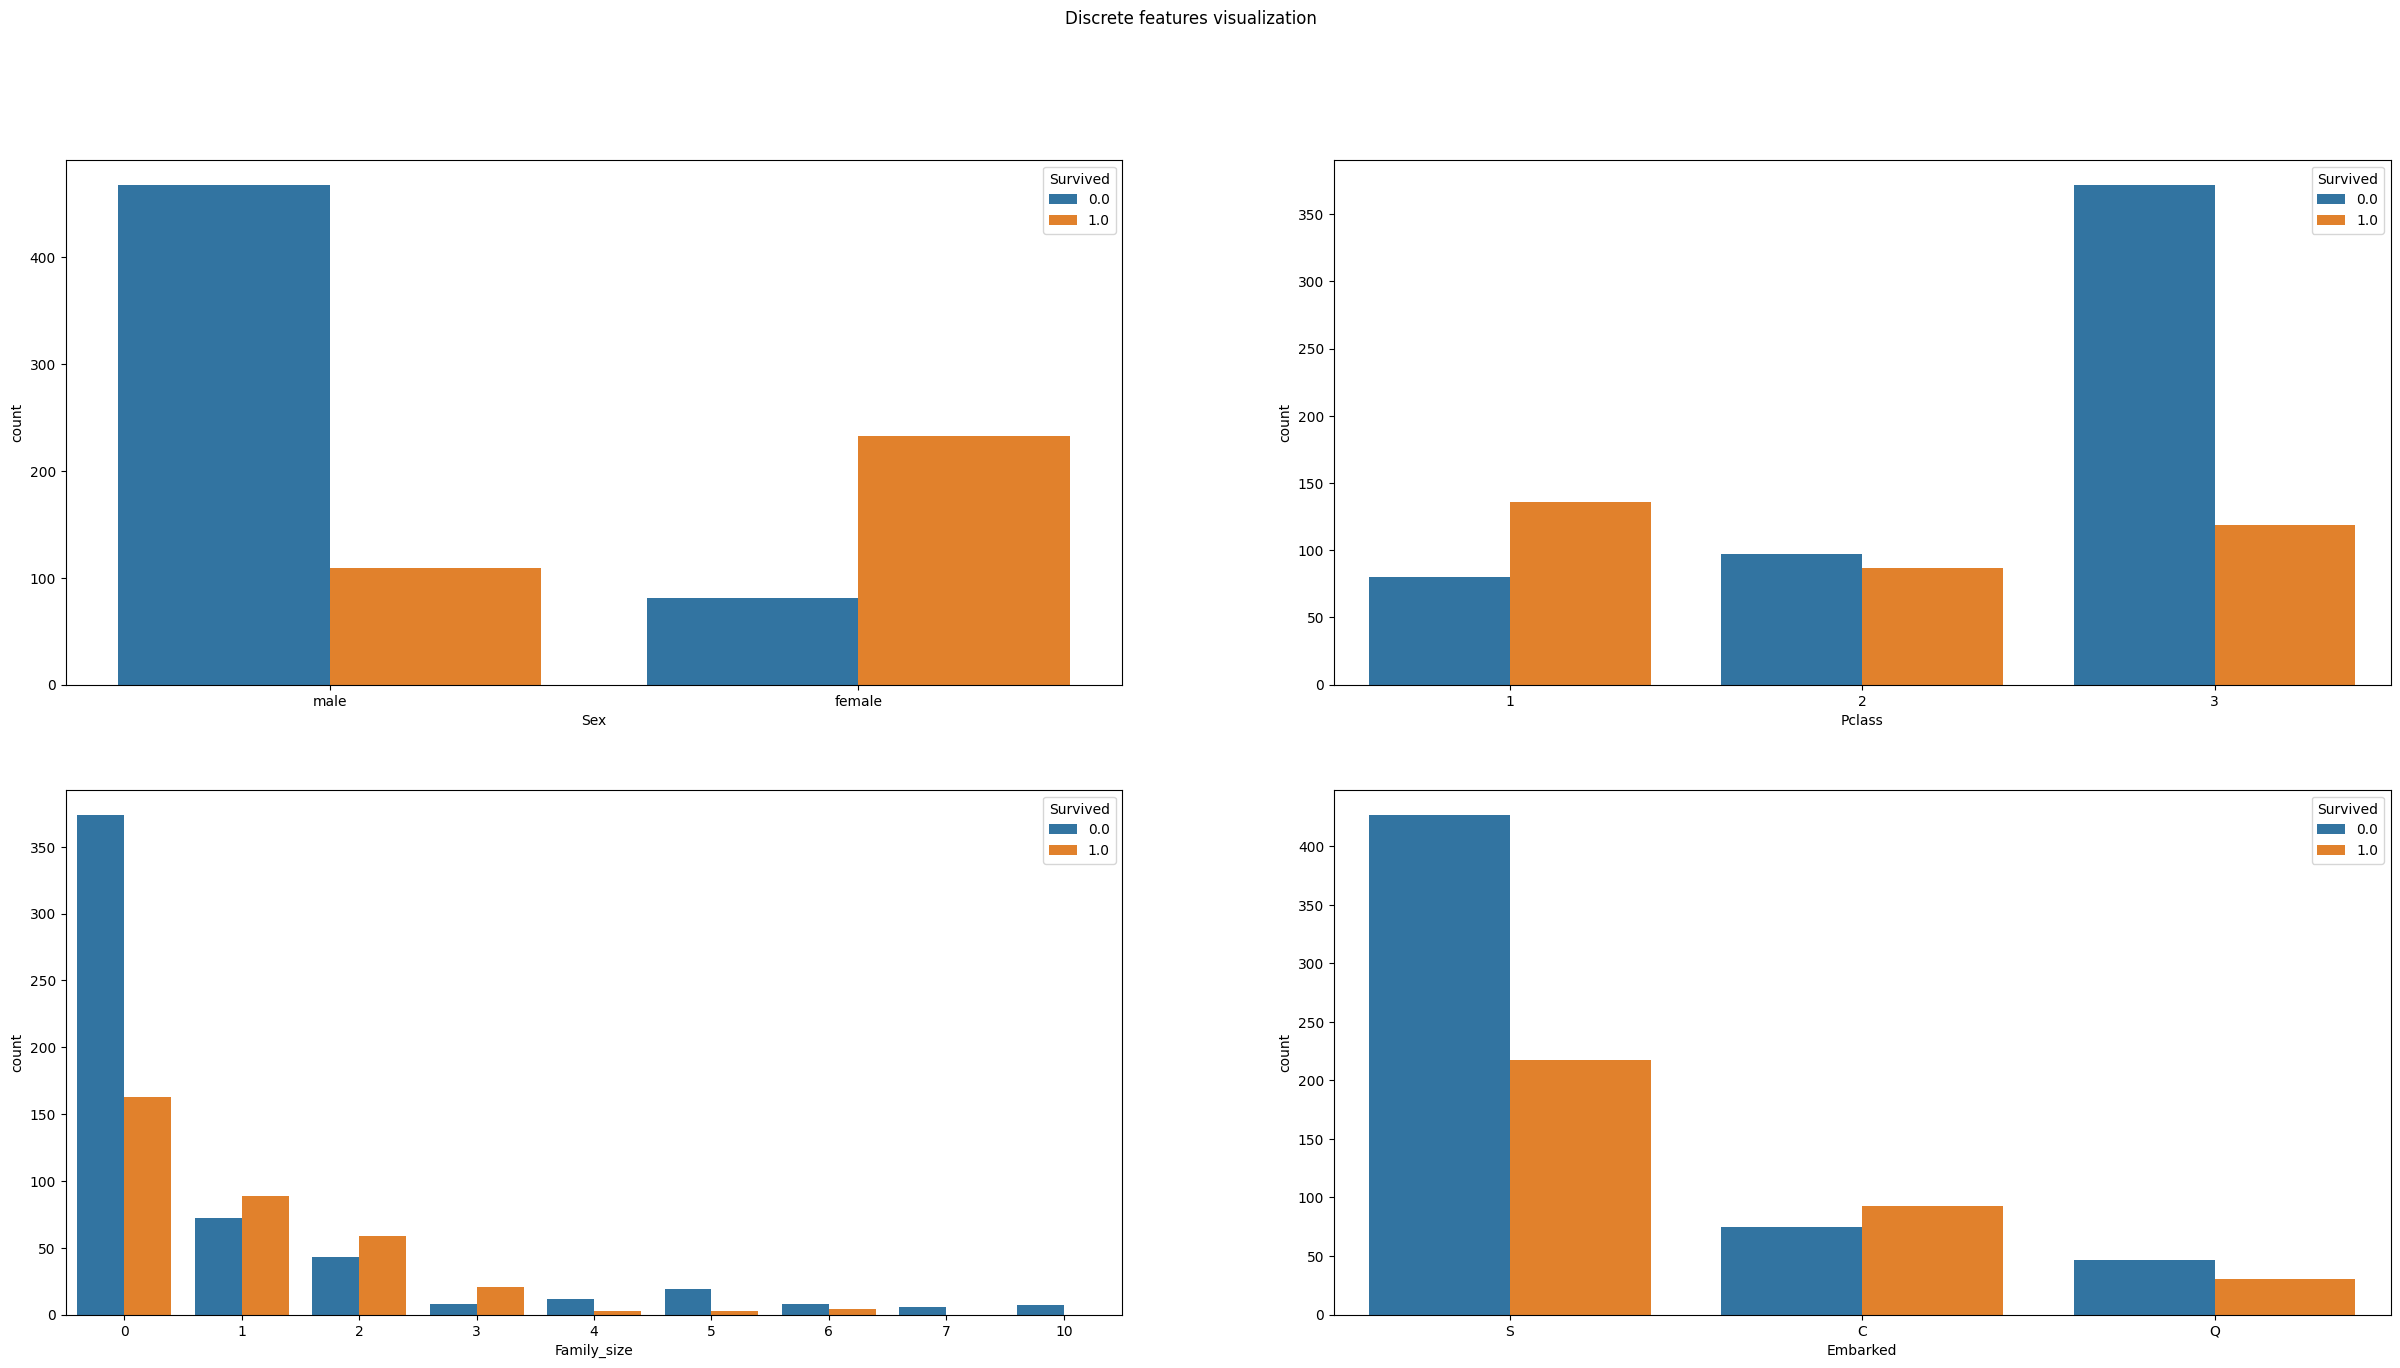

In [50]:
#Bidimensional analysis
fig, axes = plt.subplots(2,2, figsize=(30,15))
fig.suptitle('Discrete features visualization')

sns.countplot(ax = axes[0,0], data= dataset, x='Sex', hue='Survived')
sns.countplot(ax = axes[0,1], data= dataset, x='Pclass', hue='Survived')
sns.countplot(ax = axes[1,0], data= dataset, x='Family_size', hue='Survived')
sns.countplot(ax = axes[1,1], data= dataset, x='Embarked', hue='Survived')

The variables with a small amount of unique values, mainly categorical or numerical (int64), have been named "discrete" for this visualization. It looks like from a first approach that women were most likely to survive than men, that the higher class was more likely to survive and that mid size families had a higher chance as well. In any other case, a passenger was more likely to perish during the event.

The embarked section shows a tendency towards a passenger being more likely to survive or not depending on the port this one boarded the Titanic, but the reason is not evident.

<AxesSubplot: xlabel='Fare', ylabel='Count'>

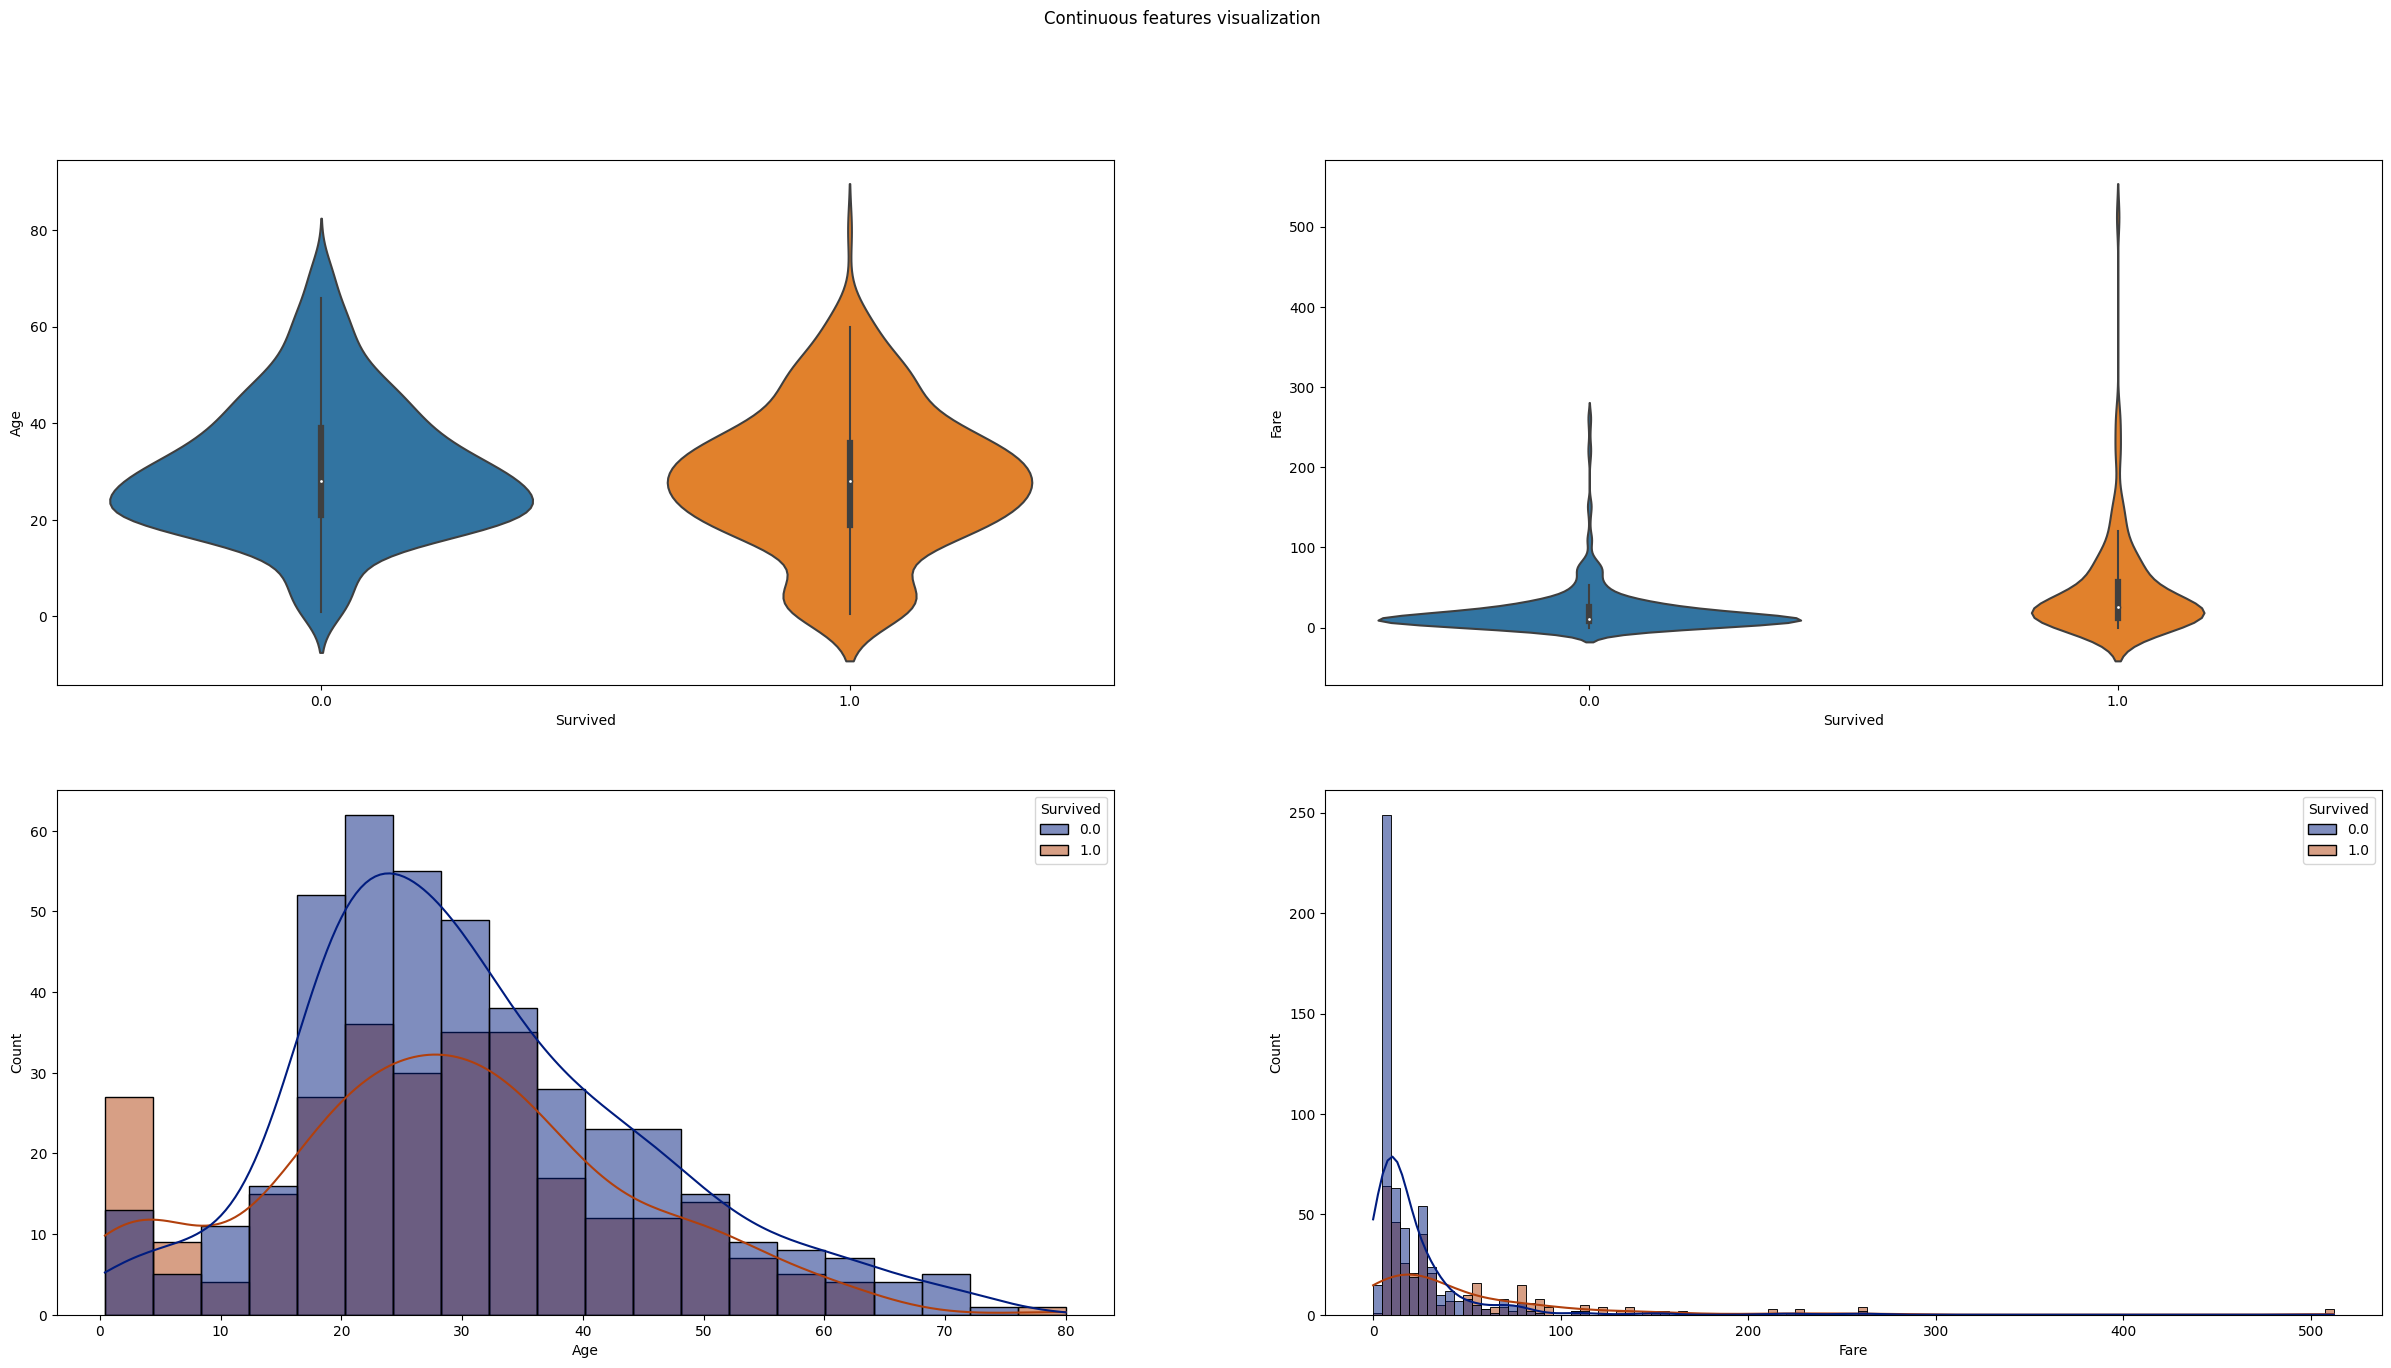

In [51]:
fig, axes = plt.subplots(2,2, figsize=(30,15))
fig.suptitle('Continuous features visualization')

sns.violinplot(ax = axes[0,0], data= dataset, x='Survived', y='Age')
sns.violinplot(ax = axes[0,1], data= dataset, x='Survived', y='Fare')
sns.histplot(ax = axes[1,0], data= dataset, x='Age', hue='Survived', kde=True, palette='dark')
sns.histplot(ax = axes[1,1], data= dataset, x='Fare', hue='Survived', kde=True, palette='dark')

The "continuous" analysis, for the age and fare, shows in both graphs a clear tendency. 

Most of the passengers paid a very cheap fare, and there are several others that paid so much compared to the average passenger. In fact these values were part of the outlier detection in the first section of this project, and was decided not to drop these values. The probability of a person surviving the event clearly increased with the fare paid, since there were less people in this range.

Age shows a more clear graphic, that shows most people grouped in the age range of 15-40 years and were more likely to perish, whereas the children were more likely to survive, as well as the oldest people of the sample.


Next step is going to be storing a copy of the current dataset to transform all the categorical variables into numerical ones to represent a correlation heatmap and a matrix plot of the features.

In [52]:
#Transform to integer for corr heatmap
ds_EDA = dataset.copy()
enc = OrdinalEncoder()
imp_cat = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
ds_EDA[['Sex','Embarked','Title']]=enc.fit_transform(ds_EDA[['Sex','Embarked','Title']])
ds_EDA[['Embarked']]=imp_cat.fit_transform(ds_EDA[['Embarked']])
num_cols = ['Fare','Age']
imp_num = KNNImputer()
ds_EDA[num_cols]=imp_num.fit_transform(ds_EDA[num_cols])
ds_EDA = ds_EDA.drop(['Ticket'],axis=1)

In [53]:
dataset.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family_size
0,0.0,3,male,22.0,A/5 21171,7.2500,S,Mr.,1
1,1.0,1,female,38.0,PC 17599,71.2833,C,Mrs.,1
2,1.0,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss.,0
3,1.0,1,female,35.0,113803,53.1000,S,Mrs.,1
4,0.0,3,male,35.0,373450,8.0500,S,Mr.,0


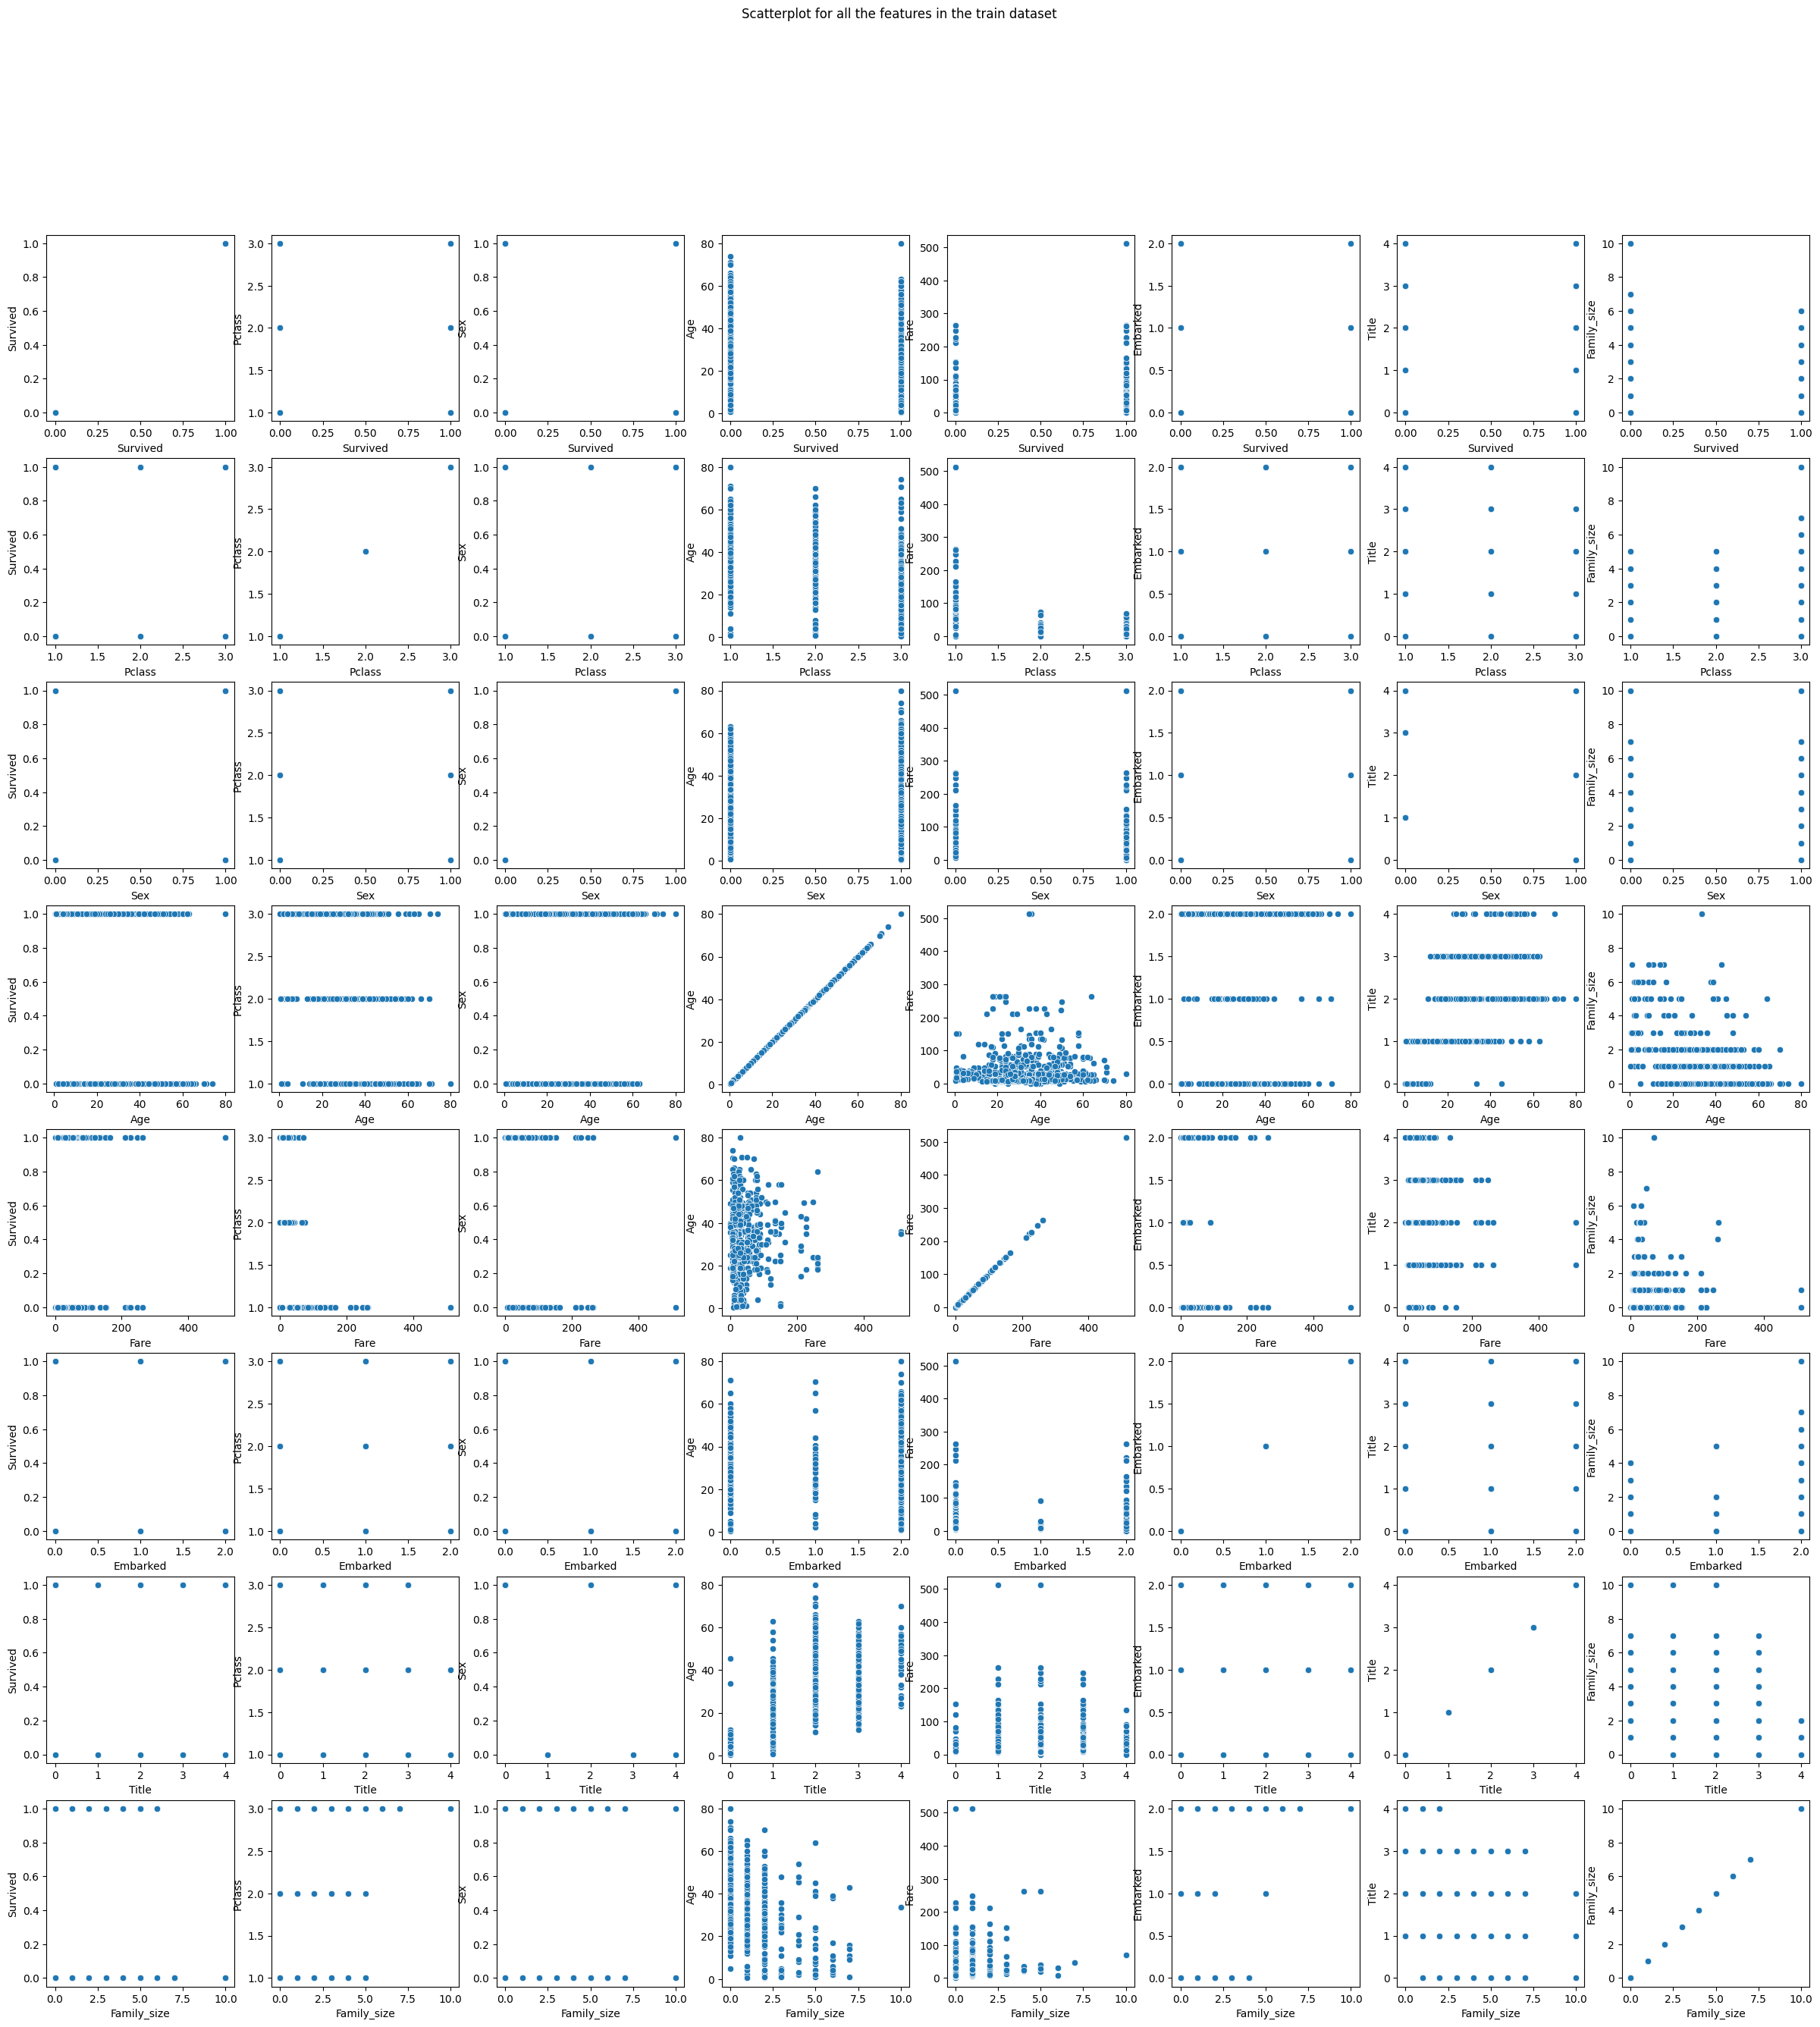

In [54]:
fig, axes = plt.subplots(len(ds_EDA.columns),len(ds_EDA.columns),figsize=(30,30))
fig.suptitle('Scatterplot for all the features in the train dataset')
for i in ds_EDA.columns:
    for j in ds_EDA.columns:
        sns.scatterplot(ax= axes[ds_EDA.columns.get_loc(i),ds_EDA.columns.get_loc(j)],data=ds_EDA[0:train_len], x=i,y=j) 

This is a very synthesizing and compact way of finding out the relation between pairs of features even though it is a bit dense. Certain information can be extracted from this, for example:

Bigger families were composed of younger people and the oldest members were travelling alone.

Higher class passengers paid more expensive fares.

The oldest passengers were females.

The less frequent titles belonged to adults exclusively.


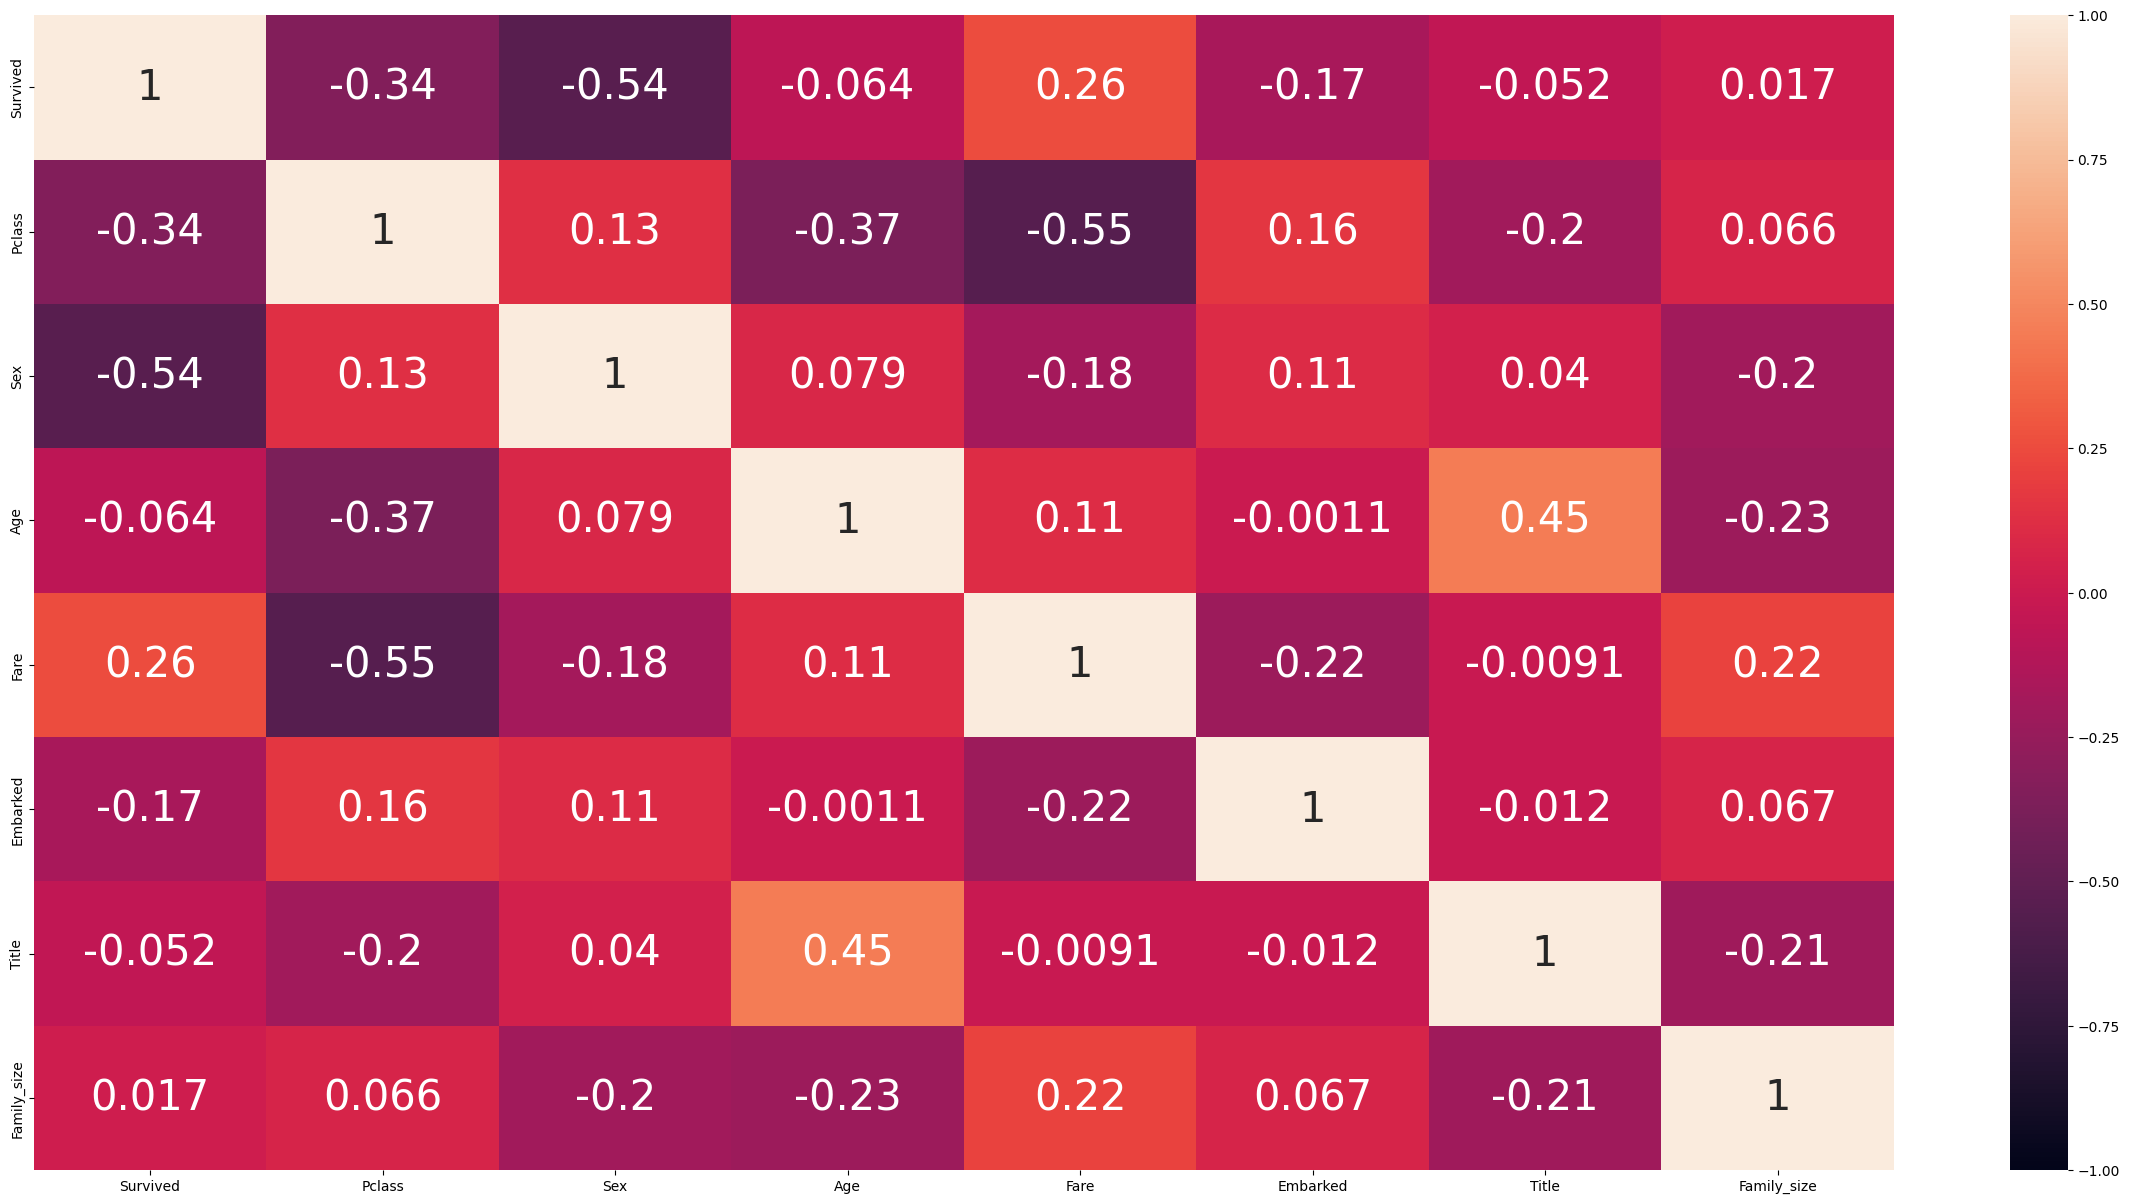

In [55]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(ds_EDA[0:train_len].corr(),vmin=-1,vmax=1,annot=True, annot_kws={"fontsize":30})

The heatmap of all the numerical variables shows the covariance of all pairs in the training set. This is a first approach to the feature importance towards the modelling of the dataset.

The most influential features to determine wheter a person survived or not are the sex (predominant), the fare and the pclass. as expected before, the class and the fare have a linear relationship: the higher the class, the more expensive it is. 

Age, title and family size seem to be very independant from the chance of survival, despite having shown before that there is a trend for this variables. 

<h2> Preprocessing </h2>

Come back to the original dataset, apply some transformations to the variables in order to adapt them for the modelling phase.

First the prefix of the ticket will be picked since it's the repeating element, and might give some information we might be missing. If there is no prefix X will be assigned as prefix.

In [56]:
Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

Since in the correlation heatmap it was shown that age has a strong correlation with Pclass, Title and Family_size, a good alternative to SimpleImputer() would be to take the median of the age values where this features are similar and apply it to the missing values. 

It is important to take in consideration that there is just a missing value for Fare in the test dataset. Since it's just the one a standarized imputer will be enough.

In [57]:
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['Pclass'] == dataset.iloc[i]["Pclass"]) & 
                               (dataset['Title'] == dataset.iloc[i]["Title"]) & 
                               (dataset['Family_size'] == dataset.iloc[i]["Family_size"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med

imputer = SimpleImputer()
dataset[['Fare']] = imputer.fit_transform(dataset[['Fare']])

All the variables of the dataset but the fare and age are categorical or have a reduced amount of unique values. Since the dataset is small, with a lenght of 1309 elements, it's going to be more accurate and not very computionally expensive to transform this features by One Hot Encoding. Since the transformations are being made manually, the get_dummies() function from Pandas will be used. 

The ordinal encoder will be used to transform the Sex since it's a binary category.

In [58]:
dataset = pd.get_dummies(dataset, columns = ["Title","Embarked","Ticket"])
dataset[['Sex']]=enc.fit_transform(dataset[['Sex']])

As mentioned at the beginning, some numerical variables have categorical features and that's why the class and the size of the family should be converted to categorical variables and encoded as well.

In [59]:
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"])

dataset['Single'] = dataset['Family_size'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Family_size'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Family_size'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Family_size'].map(lambda s: 1 if s >= 5 else 0)

Note that the original variable for family_size is going to be kept since grouping in small categories makes the model lose some information. 

The final step is to standarize the float variables.

In [60]:
scaler = StandardScaler()
dataset[['Age','Fare']] = scaler.fit_transform(dataset[['Age','Fare']])

In [61]:
# Dataset after the preprocessing, ready to be modelled
dataset.head()

,Survived,Sex,Age,Fare,Family_size,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare,...,Ticket_WC,Ticket_WEP,Ticket_X,Pclass_1,Pclass_2,Pclass_3,Single,SmallF,MedF,LargeF
0,0.0,1.0,-0.546848,-0.503595,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1.0,0.0,0.640882,0.734503,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,1.0,0.0,-0.249916,-0.490544,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,0.0,0.418183,0.382925,1,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
4,0.0,1.0,0.418183,-0.488127,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [62]:
# Undo the dataset unification -> train test split
train_model = dataset[:train_len]
test_model = dataset[train_len:]
test_model.drop(labels=["Survived"],axis = 1,inplace=True)
train_model["Survived"] = train_model["Survived"].astype(int)
y_train = train_model["Survived"]
X_train = train_model.drop(labels = ["Survived"],axis = 1)

In [63]:
train_model["Survived"] = train_model["Survived"].astype(int)
y_train = train_model["Survived"]
X_train = train_model.drop(labels = ["Survived"],axis = 1)

<h2> Ensemble modelling </h2>

The objective of the prediction is finding out wether the people from the test dataset survived or not, which is a classic binary classification problem.

The dataset is considered small so the time of the computation for different models and the tuning of the different parameters is not going to take a long time and that gives a lot of room to choose the best way to make the prediction. 

First of all, a cross validation kfold is going to be applied to the train test for different models, which is going to result in a comparation between the accuracy of the different models over the train dataset, and will help choose the best models to make the prediction over the test dataset. The models picked are:

Support Vector Classification <br>
Decision Tree Classifier <br>
Ada Boost Classifier <br>
Random Forest Classifier <br>
Extra Trees Classifier <br>
Gradient Boosting Classifier <br>
MLPC Classifier <br>
KNeighbors Classifier <br> 
Logistic Regression Classifier <br>
Linear Discrimination Analysis

In [64]:
kfold = StratifiedKFold(n_splits=10)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

In [65]:
cv_res.sort_values(['CrossValMeans'], ascending=False).head(10)

,CrossValMeans,CrossValerrors,Algorithm
5,0.836167,0.041970,GradientBoosting
0,0.832784,0.034547,SVC
8,0.828290,0.034427,LogisticRegression
9,0.824931,0.041115,LinearDiscriminantAnalysis
6,0.820449,0.031628,MultipleLayerPerceptron
7,0.809288,0.040563,KNeighboors
3,0.804806,0.050530,RandomForest
4,0.790162,0.034548,ExtraTrees
1,0.789039,0.035547,DecisionTree
2,0.787915,0.036829,AdaBoost


The models chosen for the ensemble modelling are the first 5 with the highest "CrossValMeans". Note that with the input we chose the Tree models are not performing as well as the others.

<h3> Hyperparameter tuning </h3>

A grid optimization search was made to fine the best configuration for each model, for different hyperparameters.

In [66]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.8350187265917602

In [67]:
MLPDTC = MLPClassifier(max_iter = 400, hidden_layer_sizes = (100,), random_state = 3, early_stopping = True)

MLP_param_grid = {'activation' : ['logistic','tanh','relu'],
                 'solver' : ['sgd','adam'],
                 'alpha' : [0.00001, 0.0001,0.001],
                 'learning_rate' : ['constant','adaptative'],
                 'learning_rate_init' : [0.001,0.01]}

gsMLPDTC = GridSearchCV(MLPDTC,param_grid = MLP_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsMLPDTC.fit(X_train,y_train)

MLP_best = gsMLPDTC.best_estimator_

gsMLPDTC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8316729088639201

In [68]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8350686641697879

In [69]:
LDA = LinearDiscriminantAnalysis()

lda_param_grid ={'solver': ['svd','lsqr','eigen'], 
                  'shrinkage': ['auto']}

gsLDA = GridSearchCV(LDA,param_grid = lda_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,y_train)

LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


0.823832709113608

In [70]:
LR = LogisticRegression()

lr_param_grid ={'solver': ['newton-cg','lbfgs','liblinear'], 
            'penalty': ['none', 'l1','l2'],
            'C': [1, 10, 50, 100,200,300, 1000],
            'max_iter':[1000]}

gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 0)

gsLR.fit(X_train,y_train)

LR_best = gsLR.best_estimator_

# Best score
gsLR.best_score_

0.8282896379525593

Once the models are defined, it's important to plot the learning curves to judge the way the models are adapting to the data.

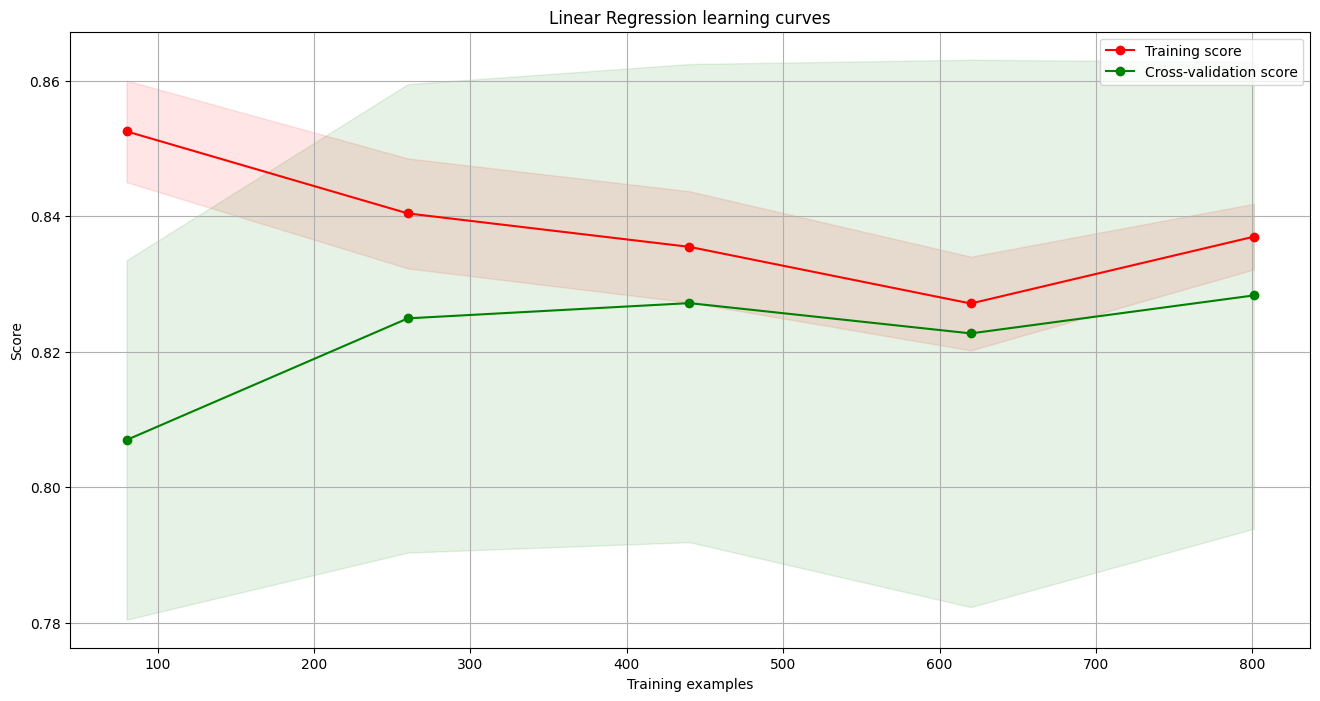

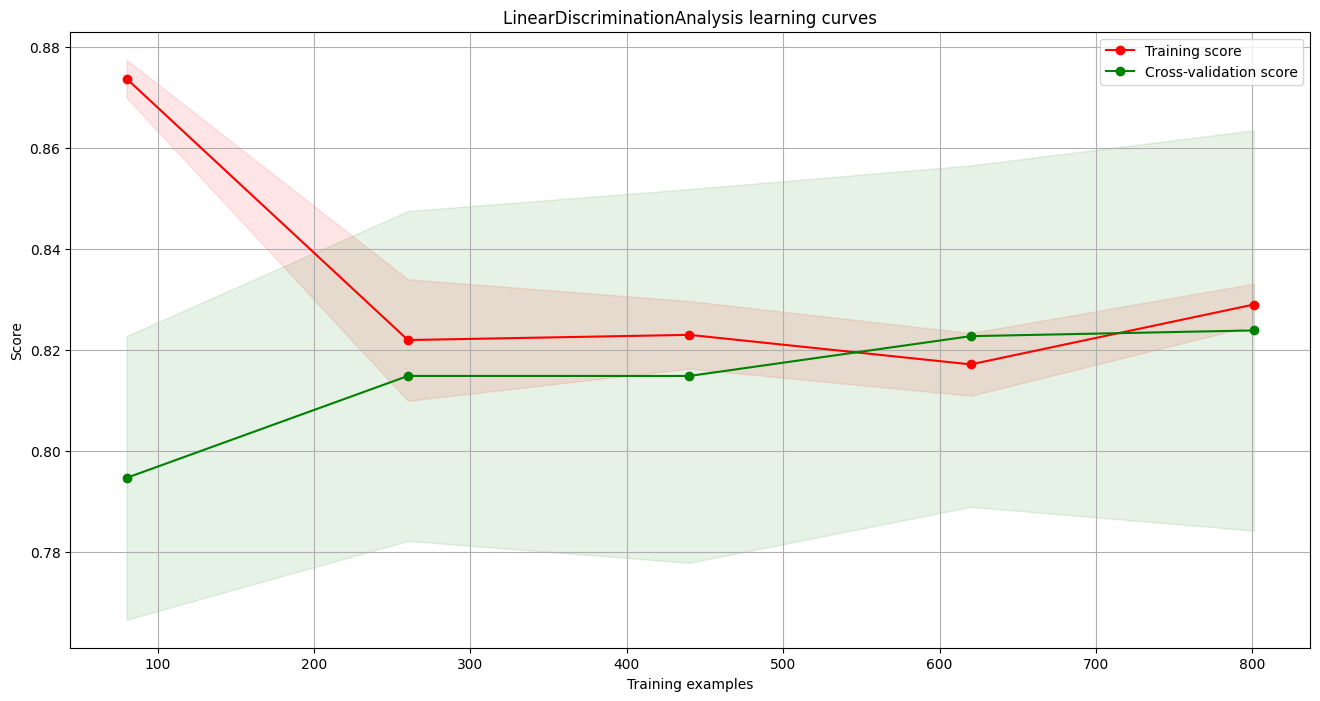

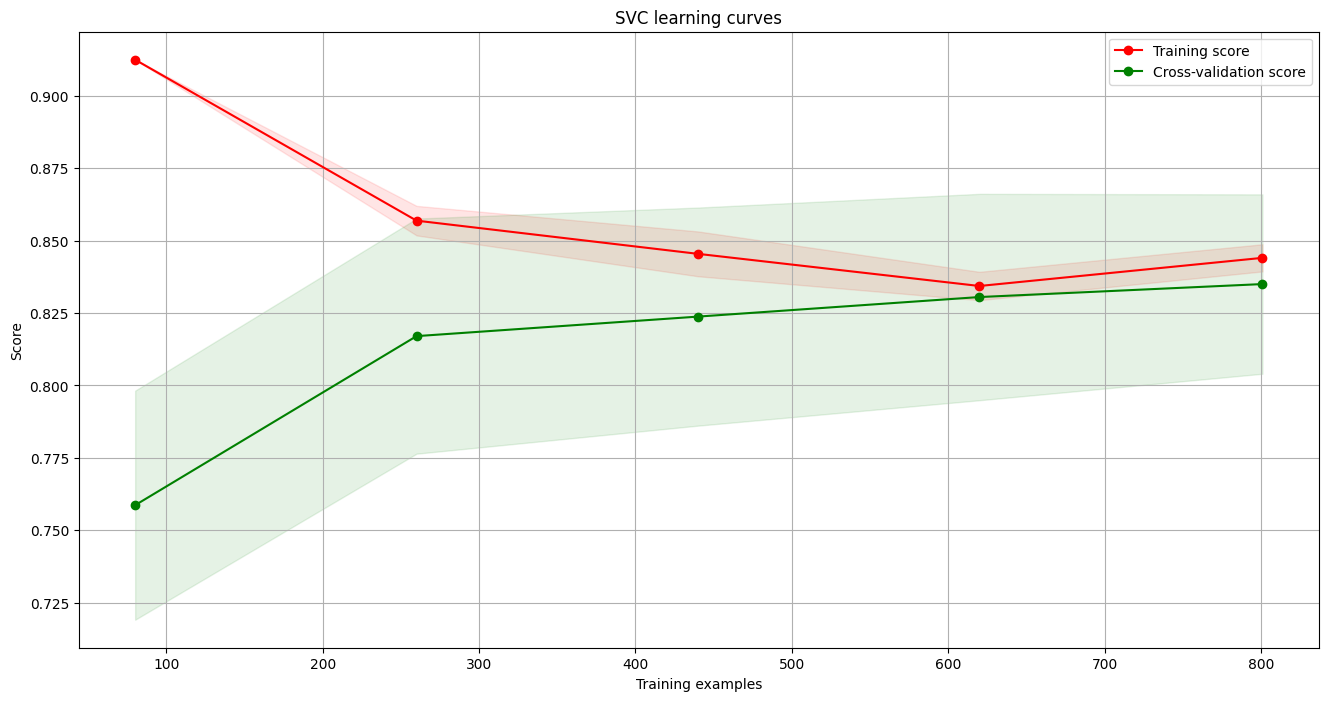

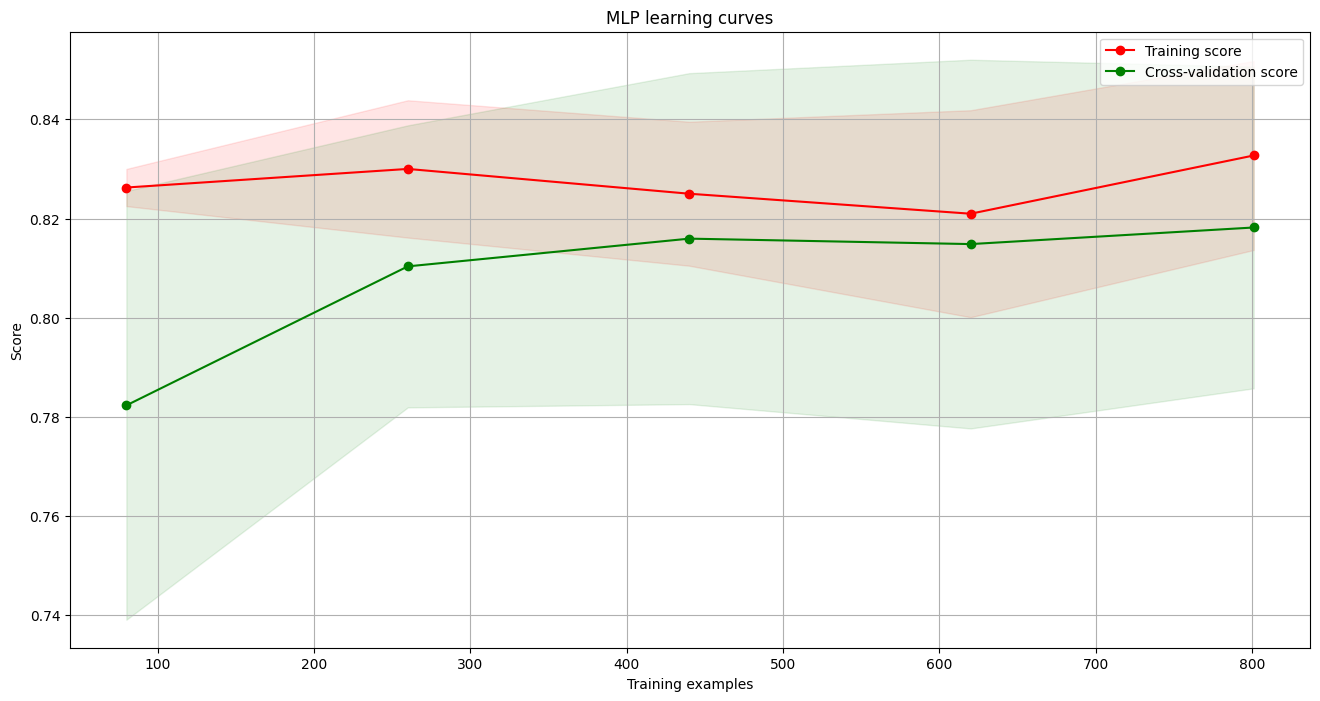

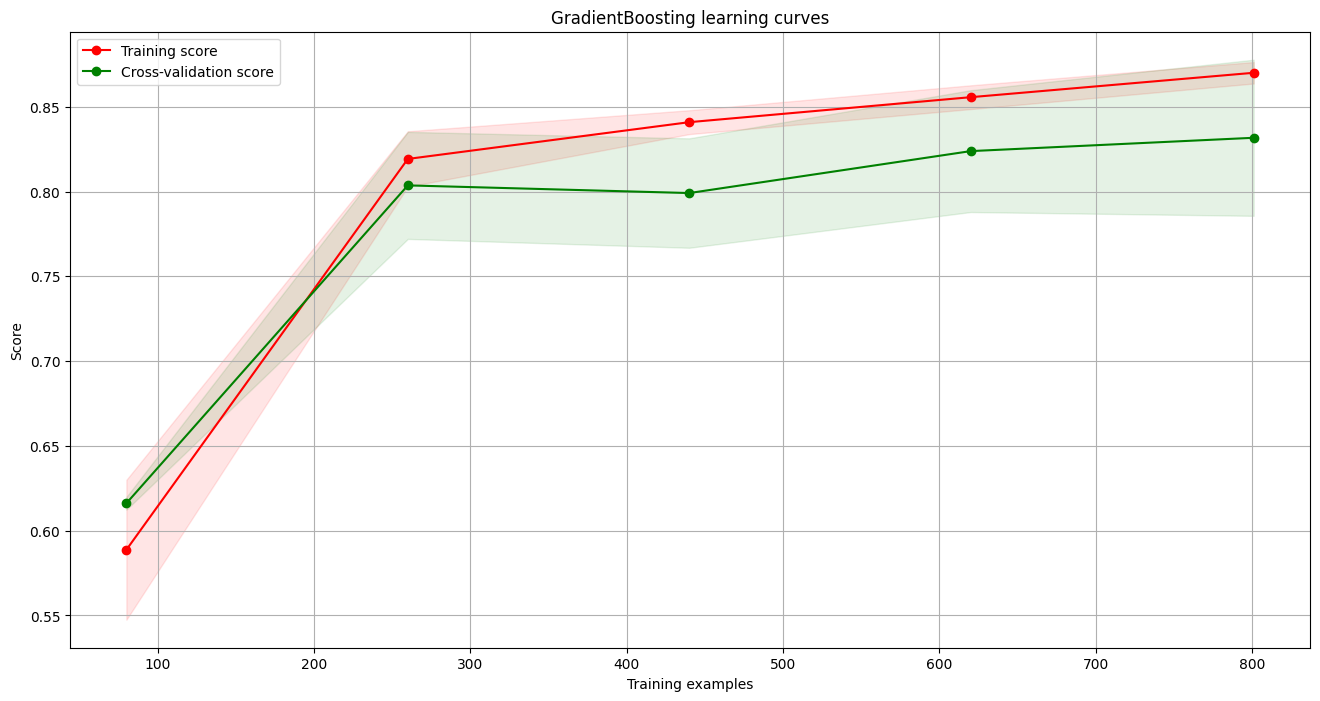

In [71]:
g = plot_learning_curve(gsLR.best_estimator_,"Linear Regression learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsLDA.best_estimator_,"LinearDiscriminationAnalysis learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsMLPDTC.best_estimator_,"MLP learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)

Some models tend to overfit the model like Gradient Boosting and in this case it looks like it could perform better with a higher amount of cases. 

Generally the training and the cross validation curve are pretty close together, which means that they are doing good at generalizing the prediction.

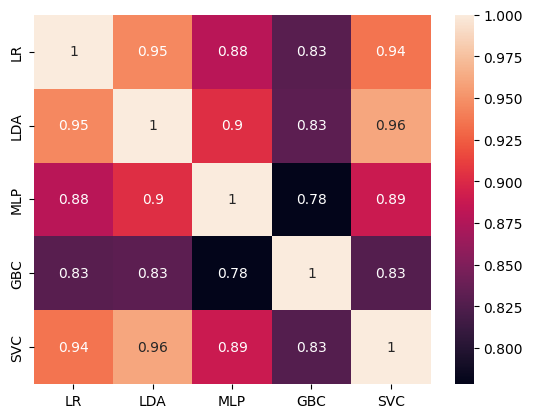

In [72]:
test_Survived_LR = pd.Series(LR_best.predict(test_model), name="LR")
test_Survived_LDA = pd.Series(LDA_best.predict(test_model), name="LDA")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test_model), name="SVC")
test_Survived_MLPC = pd.Series(MLP_best.predict(test_model), name="MLP")
test_Survived_GBC = pd.Series(GBC_best.predict(test_model), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_LR,test_Survived_LDA,test_Survived_MLPC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

The predictions for the 5 classifiers chosen are pretty similar from one another, with Multi Layer Perceptron Classifier being the least similar to the rest. Nevertheless they have results good enough to consider an ensemble modelling.

In [73]:
votingC = VotingClassifier(estimators=[('lda', LDA_best), ('lr', LR_best),
('svc', SVMC_best), ('mlpc',MLP_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

The final model is used on all the train test and finally predicts the survived individuals of the test set, storing it in a csv to submit it to the competition.

In [74]:
test_Survived = pd.Series(votingC.predict(test_model), name="Survived")
pax_id = test["PassengerId"]
results = pd.concat([pax_id,test_Survived],axis=1)

results.to_csv("submission.csv",index=False,header='Survived')